Tu ecuación por regresion polinomial es: 
 y=4.126190476190478 + (-3.1000000000000023x) + (0.516666666666667x^2
La desviacion estandar es: 1.9355078083517194 
El error estandar de la estimación es: 0.11598439960779601 
El coeficiente de correlación es: 99.8802299578171


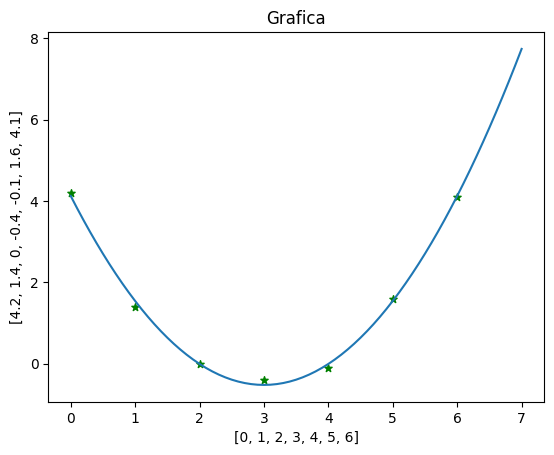

In [24]:
import matplotlib
import math
import numpy
import matplotlib.pyplot as mpl
import copy
x=[0,1,2,3,4,5,6]
y=[4.2,1.4,0,-0.4,-0.1,1.6,4.1]

sumy=sum(y)
sumx=sum(x)
xelevado2=[x[j]**2 for j in range (len(x))]
sumaxelevado2=sum(xelevado2)
xelevado3=[x[j]**3 for j in range (len(x))]
sumaxelevado3=sum(xelevado3)
xelevado4=[x[j]**4 for j in range (len(x))]
sumaxelevado4=sum(xelevado4)
multixy=[x[i] * y[i] for i in range (len(x))]
sumamultixy=sum(multixy)
multix2y=[(x[i]**2) * y[i] for i in range (len(x))]
sumamultix2y=sum(multix2y)
sumax=sum(x)
sumay=sum(y)
promx=sumax/(len(x))
promy=sumay/(len(x))


def gaussJordan(ao, bo):
    a = copy.deepcopy(ao)
    b = copy.copy(bo)

    n = len(b)
    for i in range(n):
        pivote = a[i][i]

        if pivote == 0:
            for k in range(i+1, n):
                if a[k][i] != 0:
                    a[i], a[k] = a[k], a[i]
                    b[i], b[k] = b[k], b[i]
                    pivote = a[i][i]
                    break
            else:
                raise ValueError("El sistema no tiene solución única.")
        
       #Dividir por el pivote
        for j in range(n):
            a[i][j] /= pivote
        b[i] /= pivote


        #Reducción
        for k in range(n):
            if i != k:
                #Se reduce
                valorAux = -a[k][i]
                for j in range(n):
                    a[k][j] += a[i][j] * valorAux
                b[k] += b[i] * valorAux

    
    return b

a = [[7, sumx, sumaxelevado2], [sumx, sumaxelevado2, sumaxelevado3], [sumaxelevado2, sumaxelevado3, sumaxelevado4]]
b = [sumy, sumamultixy, sumamultix2y]
c = gaussJordan(a, b)
a0= c[0]
a1= c[1]
a2= c[2]

print (f"Tu ecuación por regresion polinomial es: \n y={a0} + ({a1}x) + ({a2}x^2")

st=[(y[i] - promy)**2 for i in range (len(x))]
sumst=sum(st)
sy=math.sqrt(sumst/(7-1))
sr=[((y[i] - a0 - a1*x[i]) - (a2*(x[i])**2))**2for i in range (len(x))]
sumsr=sum(sr)
sy_x=math.sqrt(sumsr/(7-3))
r=math.sqrt((sumst-sumsr)/sumst) * 100

print(f"La desviacion estandar es: {sy} \nEl error estandar de la estimación es: {sy_x} \nEl coeficiente de correlación es: {r}")

#Grafica
graficax=[]
for i in range (int(x[0]),int(x[-1])+1):
  k=i
  while k<i+1:
    graficax.append(round(k,1))
    k+=0.1
graficay=[(a0+(a1*graficax[i])+(a2*graficax[i]**2)) for i in range (len(graficax))]

mpl.scatter(x,y, color= "green", marker="*", s=30)
mpl.plot(graficax, graficay, label="Lineal")
mpl.xlabel(x)
mpl.ylabel(y)
mpl.title("Grafica")
mpl.show()